In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import requests
import json
import time 


In [2]:
from citipy import citipy
from datetime import date

In [3]:
weather_api_key = "764fbbd7a27293806d04e4e543acf0ba"


In [4]:
output_data_file = "output/cities.csv"

In [5]:
lat_range = (-90,90)
lng_range = (-180,180)

today = date.today()

In [6]:
lat_lng = []
cities = []

In [7]:
lats = np.random.uniform(lat_range[0],lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

In [8]:
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name

    if city not in cities:
        cities.append(city)

print(len(cities))

633


In [9]:
unit = 'imperial'

url = f"http://api.openweathermap.org/data/2.5/weather?appid=764fbbd7a27293806d04e4e543acf0ba&units={unit}"

city_data = []

record_count = 1 
set_count = 1 

In [10]:
for i, city in enumerate(cities):
     if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        

In [11]:
city_url = url + "&q=" + city


print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

Processing Record 0 of Set 13 | esil


In [12]:
print(city_url)


record_count += 1


http://api.openweathermap.org/data/2.5/weather?appid=764fbbd7a27293806d04e4e543acf0ba&units=imperial&q=esil


In [13]:
for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    print(city_url)

    record_count += 1

    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
              
print("Data Retrieval Complete      ")


Processing Record 1 of Set 13 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=764fbbd7a27293806d04e4e543acf0ba&units=imperial&q=saint george
Processing Record 2 of Set 13 | chateauroux
http://api.openweathermap.org/data/2.5/weather?appid=764fbbd7a27293806d04e4e543acf0ba&units=imperial&q=chateauroux
Processing Record 3 of Set 13 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=764fbbd7a27293806d04e4e543acf0ba&units=imperial&q=illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 13 | juneau
http://api.openweathermap.org/data/2.5/weather?appid=764fbbd7a27293806d04e4e543acf0ba&units=imperial&q=juneau
Processing Record 5 of Set 13 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=764fbbd7a27293806d04e4e543acf0ba&units=imperial&q=cape town
Processing Record 6 of Set 13 | bhachau
http://api.openweathermap.org/data/2.5/weather?appid=764fbbd7a27293806d04e4e543acf0ba&units=imperial&q=bhachau
Processing Record 7 of Set 1

In [14]:
CityWeather= pd.DataFrame(city_data)

CityWeather.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [15]:
CityWeather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1041,-113.5841,41.25,40,0,3.44,US,1676116059
1,chateauroux,46.8167,1.7000,44.60,57,0,9.22,FR,1676116059
2,juneau,58.3019,-134.4197,35.22,97,100,19.57,US,1676115919
3,cape town,-33.9258,18.4232,93.61,32,0,13.80,ZA,1676115896
4,bhachau,23.2833,70.3500,84.47,28,0,9.19,IN,1676116060
...,...,...,...,...,...,...,...,...,...
584,skibotn,69.3913,20.2679,26.82,93,100,13.29,NO,1676116288
585,gracac,44.3006,15.8547,46.15,28,32,2.55,HR,1676116289
586,puerto suarez,-18.9500,-57.8000,75.76,88,20,5.75,BO,1676116290
587,matagami,49.7502,-77.6328,-11.09,77,0,3.44,CA,1676116290


In [16]:
counts = CityWeather.count()
countsinfo = CityWeather.describe()
print(counts)
countsinfo

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,19.545392,16.928266,53.714177,70.266553,54.896435,8.823667,1.676116e+09
std,32.782361,90.447343,32.595476,24.854445,39.499778,6.749797,1.044009e+02
min,-54.800000,-175.200000,-54.530000,4.000000,0.000000,0.000000,1.676115e+09
25%,-7.300000,-65.102300,32.230000,58.000000,12.000000,4.070000,1.676116e+09
50%,22.276900,21.688600,63.300000,77.000000,62.000000,7.430000,1.676116e+09
75%,47.382100,97.200000,79.500000,89.000000,97.000000,11.590000,1.676116e+09
max,78.218600,178.416700,104.580000,100.000000,100.000000,55.230000,1.676116e+09


In [17]:
scatterplotdata = CityWeather[['City', 'Lat', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

# Export the city_data into a csv
scatterplotdata.to_csv(r'/Users/sangh/Desktop/INST414/DataforScatterplots.csv', index = False)

scatterplotdata.head(20)

,City,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,saint george,37.1041,41.25,40,0,3.44
1,chateauroux,46.8167,44.60,57,0,9.22
2,juneau,58.3019,35.22,97,100,19.57
3,cape town,-33.9258,93.61,32,0,13.80
4,bhachau,23.2833,84.47,28,0,9.19
5,bekhteyevka,50.8072,31.10,88,100,10.74
6,rikitea,-23.1203,78.78,70,38,16.58
7,provideniya,64.3833,-16.89,90,70,7.18
8,san luis,-33.2950,84.76,31,40,17.31
9,punta arenas,-53.1500,44.62,75,20,9.22


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sarahgrant/Desktop/BCHomeworks/pythonAPIs-challenge/WeatherPy/dataforscatterplots/Fig1.png'

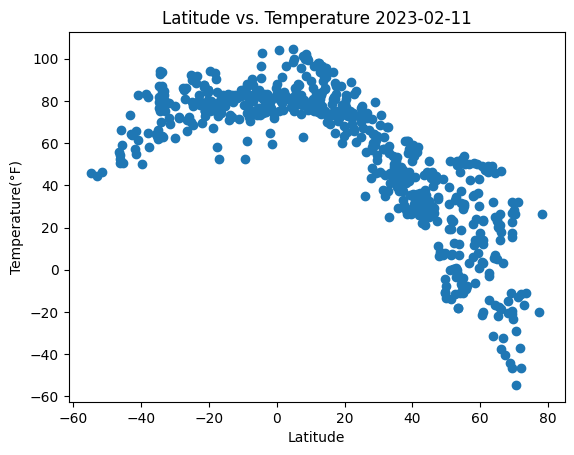

In [18]:

x = scatterplotdata['Lat']
y1 = scatterplotdata['Max Temp']

plt.scatter(x,y1)

plt.xlabel('Latitude')
plt.ylabel('Temperature(°F)')
plt.title(f'Latitude vs. Temperature {today}')


plt.savefig("/Users/sarahgrant/Desktop/BCHomeworks/pythonAPIs-challenge/WeatherPy/dataforscatterplots/Fig1.png")


plt.grid()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sarahgrant/Desktop/BCHomeworks/pythonAPIs-challenge/WeatherPy/dataforscatterplots/Fig2.png'

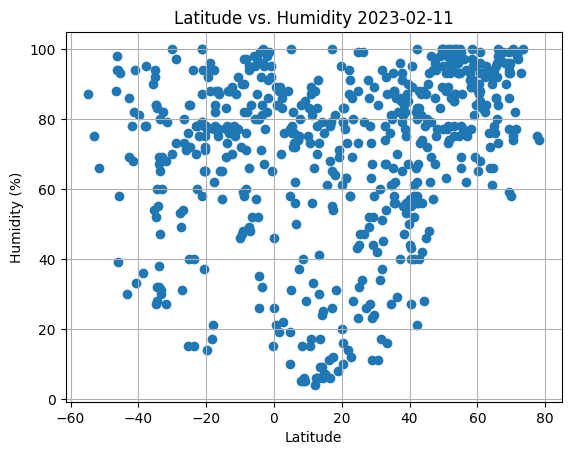

In [19]:

y2 = scatterplotdata['Humidity']

plt.scatter(x,y2)


plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity {today}')
plt.grid()


plt.savefig("/Users/sarahgrant/Desktop/BCHomeworks/pythonAPIs-challenge/WeatherPy/dataforscatterplots/Fig2.png")

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sarahgrant/Desktop/BCHomeworks/pythonAPIs-challenge/WeatherPy/dataforscatterplots/Fig3.png'

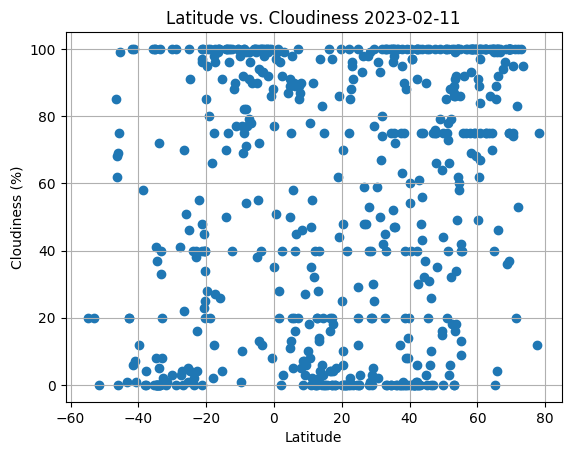

In [20]:

y3 = scatterplotdata['Cloudiness']

plt.scatter(x,y3)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs. Cloudiness {today}')
plt.grid()


plt.savefig("/Users/sarahgrant/Desktop/BCHomeworks/pythonAPIs-challenge/WeatherPy/dataforscatterplots/Fig3.png")

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sarahgrant/Desktop/BCHomeworks/pythonAPIs-challenge/WeatherPy/dataforscatterplots/Fig4.png'

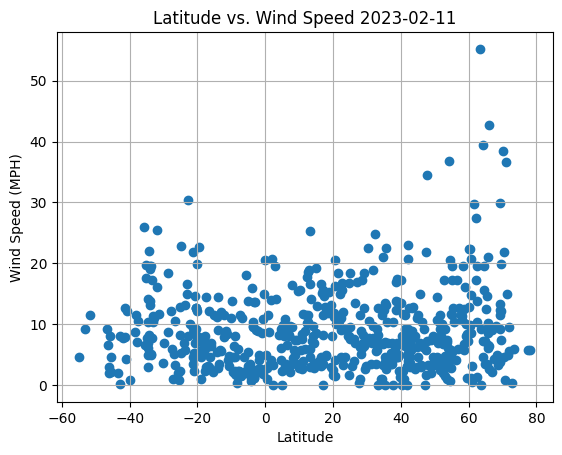

In [21]:

y4 = scatterplotdata['Wind Speed']

plt.scatter(x,y4)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f'Latitude vs. Wind Speed {today}')
plt.grid()

plt.savefig("/Users/sarahgrant/Desktop/BCHomeworks/pythonAPIs-challenge/WeatherPy/dataforscatterplots/Fig4.png")
plt.show()